In [2]:
import pandas as pd
import numpy as np
import preprocess_text as pt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv('data/train.csv')

In [4]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
unique_words = {word: 1 for word in train_df.question2.values}

In [15]:
len(train_df.question2.values)

404290

In [9]:
len(unique_words)

290457

In [14]:
len(unique_words)

299175

In [30]:
test_df = pd.read_csv('data/test.csv')

In [11]:
unique_twords = {word: 1 for word in test_df.question1.values}

In [12]:
len(unique_twords)

2211009

In [5]:
pre = pt.Preprocess_text(word2vec_path="data/GoogleNews-vectors-negative300.bin")

[nltk_data] Downloading package punkt to /home/joakim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
def data_sentences(data):
    q1_tok = pre.tokenize_data(data['question1'])
    q2_tok = pre.tokenize_data(data['question2'])
    return np.hstack([q1_tok, q2_tok])

def find_length(sentences):
    return np.array([len(sent) for sent in sentences])

def find_num_unknowns(sentences): 
    return np.array([len(sent) - np.count_nonzero(sent) for sent in sentences])

In [7]:
tok_words = data_sentences(train_df)

In [8]:
word_per_sentence = find_length(tok_words)

In [9]:
num_unknowns = find_num_unknowns(tok_words)

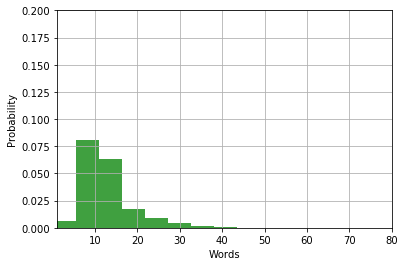

In [37]:
mu, sigma = 100, np.std(word_per_sentence)

# the histogram of the data
n, bins, patches = plt.hist(word_per_sentence, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Words')
plt.ylabel('Probability')
plt.axis([1, 80, 0, 0.2])
plt.grid(True)

plt.show()

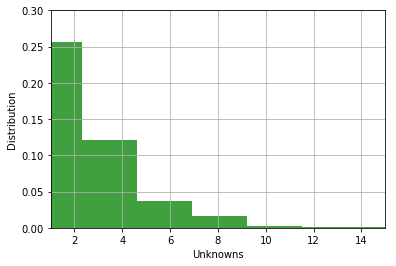

In [70]:
mu, sigma = 100, np.std(num_unknowns)

# the histogram of the data
n, bins, patches = plt.hist(num_unknowns, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Unknowns')
plt.ylabel('Distribution')
plt.axis([1, 15, 0, 0.3])
plt.grid(True)

plt.show()

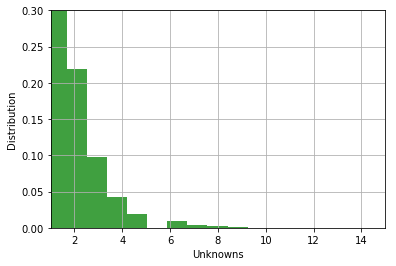

In [11]:
#new improved?
mu, sigma = 100, np.std(num_unknowns)

# the histogram of the data
n, bins, patches = plt.hist(num_unknowns, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Unknowns')
plt.ylabel('Distribution')
plt.axis([1, 15, 0, 0.3])
plt.grid(True)

plt.show()

In [38]:
print("Mean number of words:" + str(float(np.mean(word_per_sentence))))

Mean number of words:12.5394951644


In [31]:
test_word_lengths = data_sentences_length(test_df)

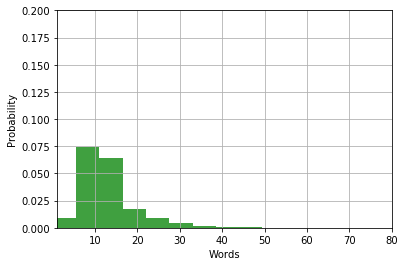

In [32]:
mu, sigma = 100, np.std(test_word_lengths)

# the histogram of the data
n, bins, patches = plt.hist(test_word_lengths, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Words')
plt.ylabel('Probability')
plt.axis([1, 80, 0, 0.2])
plt.grid(True)

plt.show()

In [33]:
print("Mean number of words:" + str(float(np.mean(test_word_lengths))))

Mean number of words:12.5372031498


In [34]:
print(test_word_lengths[np.argmax(test_word_lengths)])

275


In [41]:
print(word_per_sentence[np.argmax(word_per_sentence)])

272
